# Open Trust Fabric (OTF)
# Digital Platform Use Case
# 01-DataMap
June 2021

# Introduction 

This notebook converts raw AirBnB data into Digital Platform data following the Open Trust Framework to model an ecosystem of contracts. In this framework, contracts are considered as boundary objects which can be used to model relations across different economic agents.

The purpose of this approach is to show how digital contracts can be used to model the European economy. In particular, we aim to model the workings and dynamics of a Digital Platform such as AirBnB from an ecosystem of contracts approach. 

According to OTF's framework, contracts can be represented by the following elements:
- Parties: individual parties participating in contracts
- Events: events defined within the contract
- Assets: assets considered by the contract

The datamap proposed in this approach translates OTF framework into a coherent data structure (see figure below in this notebook). The key point of this datamap is that it allows to model contracts separating OTF-specific tables (in blue) and Domain-specific tables (in red) to obtain policy-relevant tables (in yellow).


* Table of contents

* [Data_Sources](#data) 
* [Model_ER](#model)  
* [OTF CONTRACT Models Repo](#0)
* [CONTRACTS EVENT 1](#1)
* [CONTRACTS PARTIES 2](#2)
* [CONTRACTS ASSET 3](#3)
* [PARTIES DOMAIN FEATURE 4](#4)
* [EVENTS DOMAIN FEATURE 5](#5)
* [ASSETS DOMAIN FEATURE ateco 6](#6)
* [POLICY NETWORK 7](#7)

# Data_Sources

The Digital Platform use case uses AirBnB listings and reviews as input data. Data are acquired from [Inside AirBnB](http://insideairbnb.com/get-the-data.html). Inside AirBnB collects monthly data on AirBnB usage for different cities across the world. Inside AirBnB data is useful to have a glimpse of AirBnB dynamics. 

If you find Inside AirBnB data as valuable as we do, please [consider donating](https://www.paypal.com/donate/?cmd=_s-xclick&hosted_button_id=CKKMZCXWGZSP4) to the project.  

The input data used in this notebook are:
- listings.csv, which provides pre-processed listing data for European capitals
- reviews.csv, which provides pre-processed data for reviews
- capitals.csv, which contains the list of European capitals

We will share the source dataset under a public repository.

In [1]:
import pandas as pd
import random
import string

In [5]:
# load file in memory
listings_append = pd.read_csv('listings.csv', low_memory=False) 
reviews_append = pd.read_csv('reviews.csv', low_memory=False)
capitals = pd.read_csv('capitals.csv', sep = ";")

In [3]:
test = pd.read_csv('listings.csv', low_memory=False) 

In [4]:
test.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200818040300,2020-08-19,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,2.00
1,20168,https://www.airbnb.com/rooms/20168,20200818040300,2020-08-18,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,3,1,2,0,2.67
2,25428,https://www.airbnb.com/rooms/25428,20200818040300,2020-08-18,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20200818040300,2020-08-18,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.09
4,28871,https://www.airbnb.com/rooms/28871,20200818040300,2020-08-19,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.74


# Data_ER_Schema

The picture below represents the datamap used for the Digital Platform Use Case.

Data is organised as follows:
- Grey tables represent the AirBnB raw input data
- Blue tables represent Contract-specific data
- Red tables represent context-specific data
- Yellow tables represent policy-relevant tables

The individual tables identify specific aspects of the OTF contracts framework, namely:
- Participants
- Assets
- Events

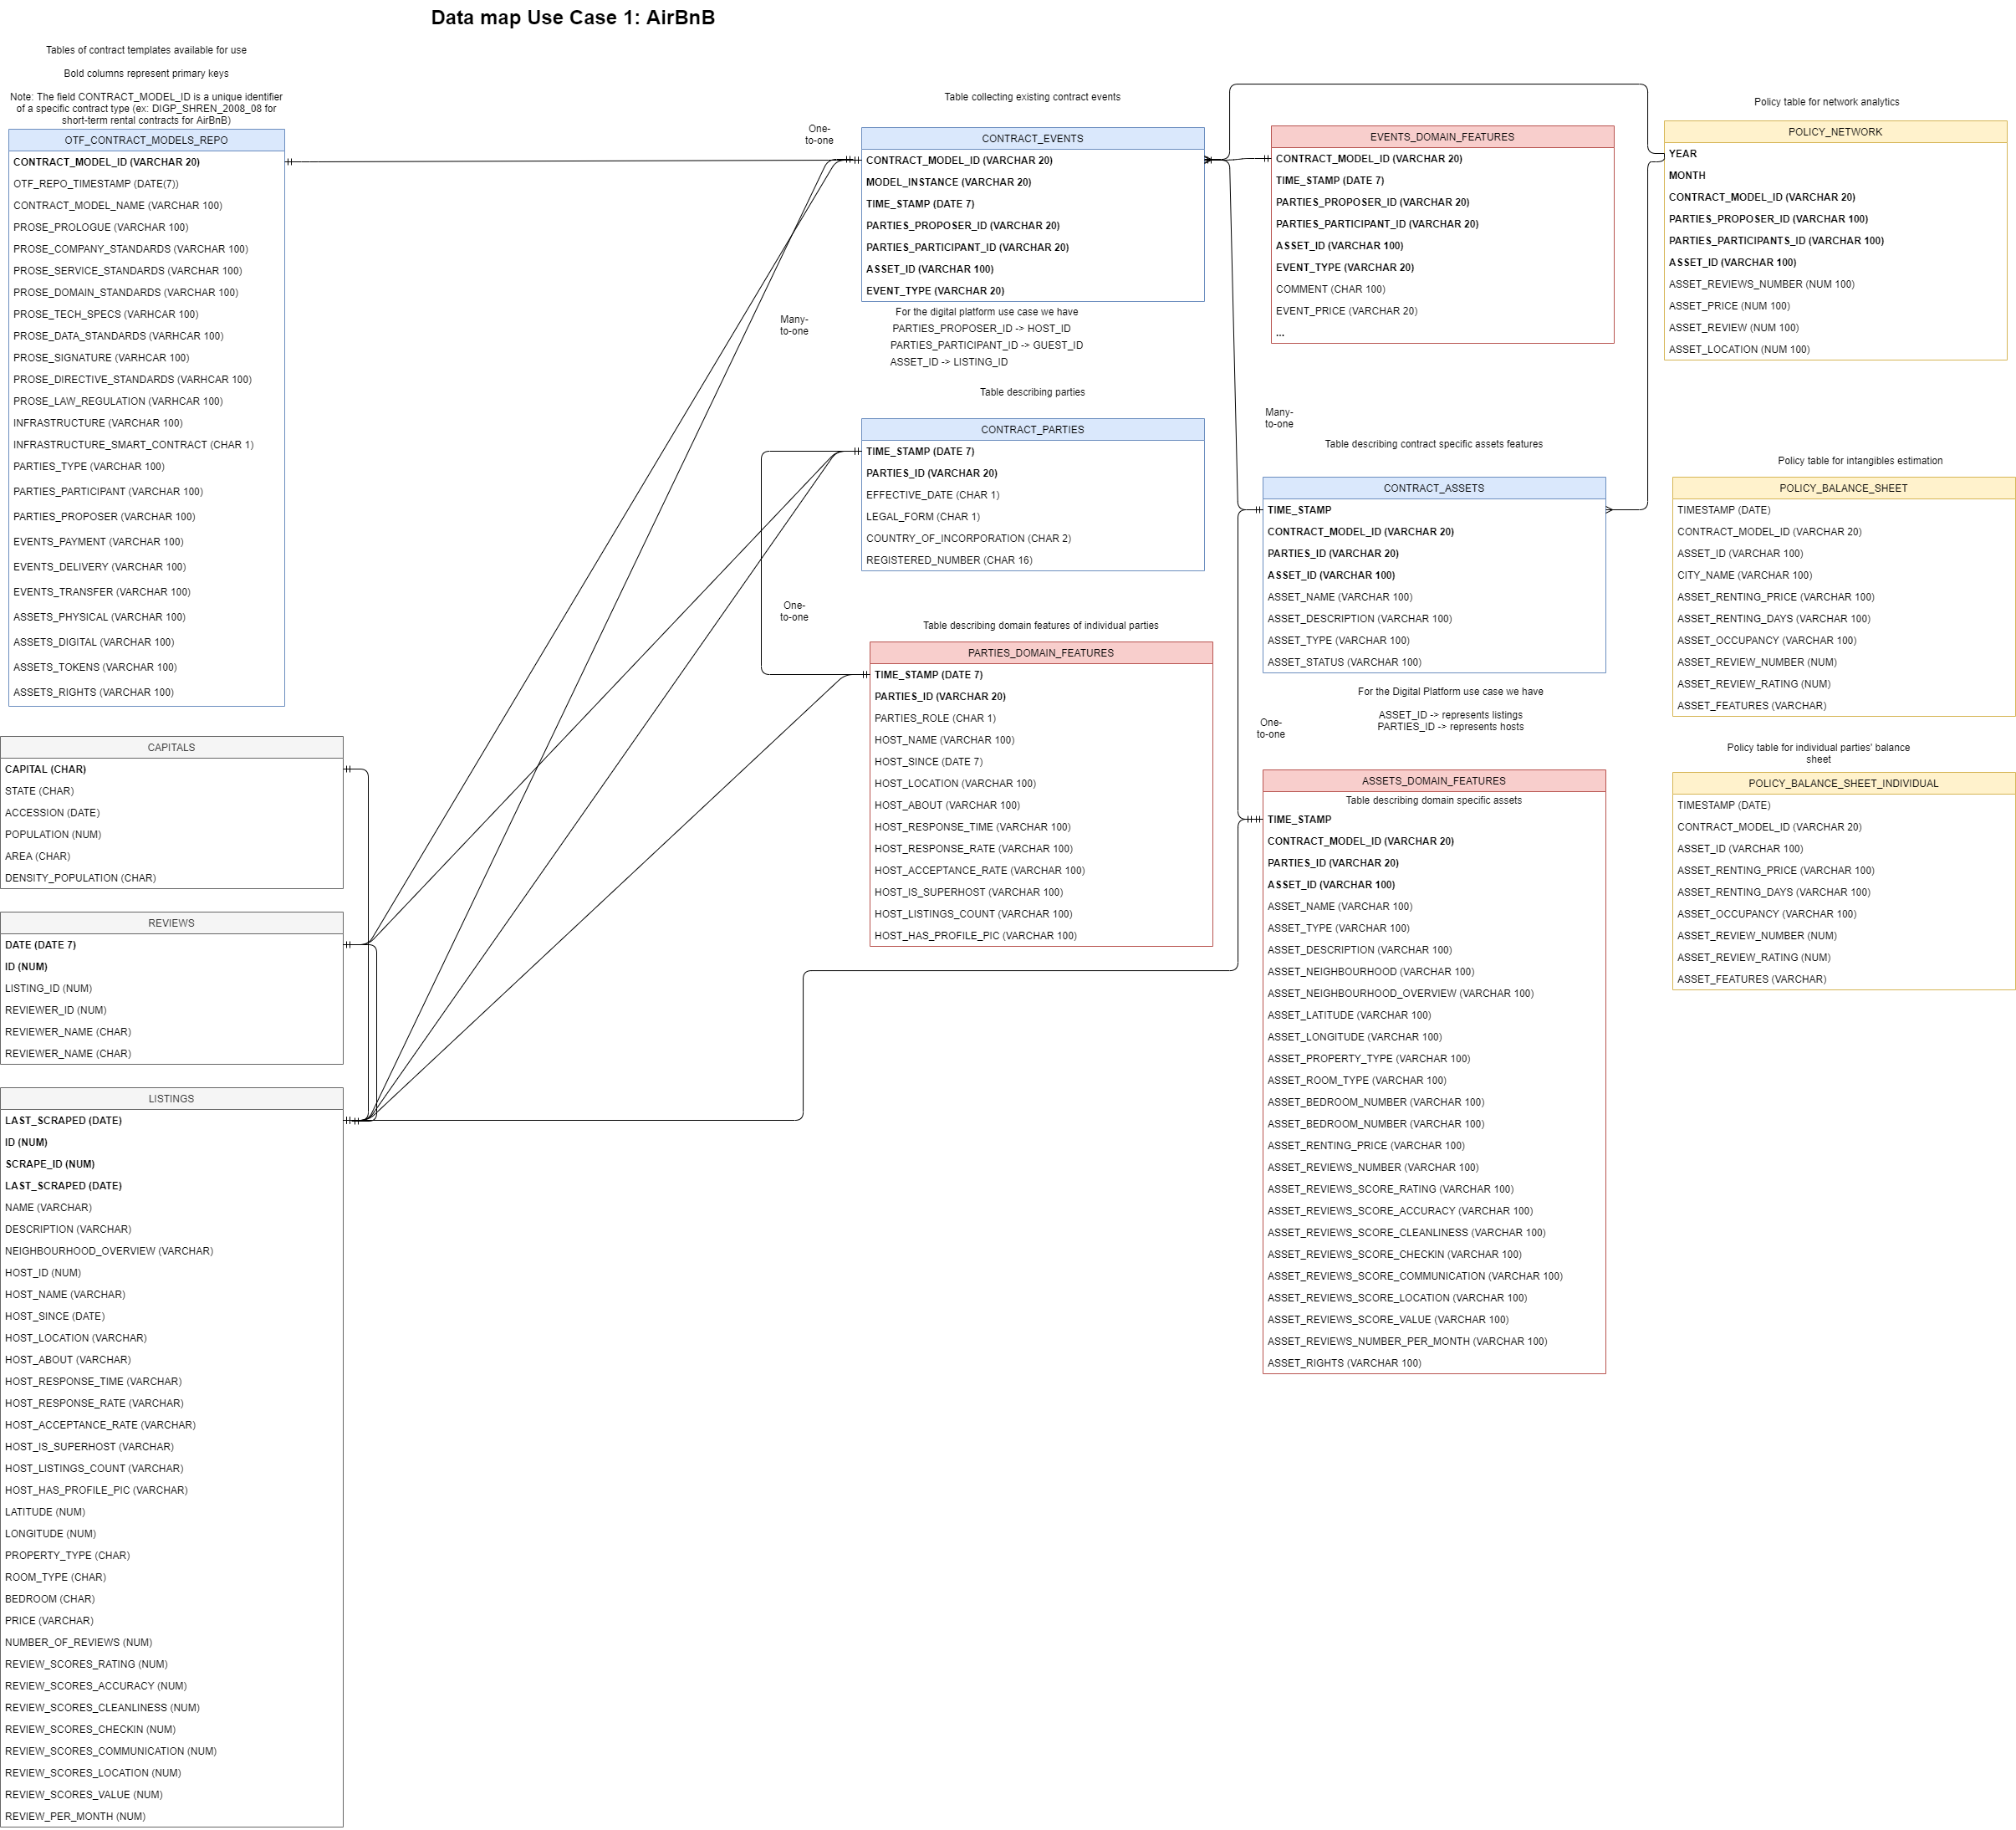

In [73]:
from PIL import Image
import numpy as np

im_frame = Image.open( 'OTF_DigitalPlatform_DataMap.png')
im_frame

# 0- OTF Contract models repo

In [6]:
# First we create an (optional) contract repo table
# The purpose of this table is to list all possible contract types
# At this stage we consider a singole contract type, namely: AirBnB renting

contract_repo_data = [['DIGP_SHREN_2008_08', '2008-08-01', 'Digital_platform_short_rental']]
OTF_CONTRACT_MODELS_REPO = pd.DataFrame(contract_repo_data, columns = ['CONTRACT_MODEL_ID', 'OTF_REPO_TIMESTAMP', 'CONTRACT_MODEL_NAME', ])
# OTF contract model repo set-up

# At the moment we create a very simple contract repo:
# - As we consider only AirBnB short-term letting contracts, we create only one contract type
# - At this stage we include only the most relevant variables: 
    # - CONTRACT_MODEL_ID -> indicating the ID of short-term letting contracts
    # - OTF_REPO_TIMESTAMP -> a time stamp indicating when this specific contract type was created (at this stage we assumed the year in which AirBnB was founded)
    # - CONTRACT_MODEL_NAME -> a descriptive name for the individual contract model

In [7]:
# OTF_CONTRACT_MODELS_REPO.to_csv("OTF_CONTRACT_MODELS_REPO.csv", compression='gzip')
# Optional code to save your own contract_events table

## <span style='color:Blue'> 1 - CONTRACT_EVENTS  </span> <a class="anchor" id="1"></a>

We populate the table for contract events.

In [8]:
listings_append['last_scraped'] = pd.to_datetime(listings_append['last_scraped'])
listings_append['date_year_month']=listings_append['last_scraped'].dt.to_period('M') 
# We convert the last_scraped variable to a date format


In [9]:
len(listings_append)

18949

In [10]:
listing_table = listings_append[['id','host_id']].copy()\
                                                 .rename(columns={"id" : "listing_id"})

create_df = reviews_append.merge(listing_table, on=["listing_id"], how='left')
create_df.drop_duplicates(inplace=True)
# We start by merging listings with reviews via "listing_id" and removing duplicates

In [11]:
create_df.shape
# We explore the size of the dataset

(469690, 7)

In [12]:
create_df.head()
# We explore the columns of the dataset

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_id
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,3159
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,3159
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,3159
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,3159
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,3159


In [13]:
def create_random_string():
    return ''.join(pd.util.testing.rands_array(10,1))
# We create a function to generate random contract codes

In [14]:
create_df['MODEL_INSTANCE'] = [create_random_string() for i in range(len(create_df))]
# We create random strings for individual contract IDs (each review is interpreted as a proxy for an individual contract)

In [15]:
create_df = create_df.reset_index()

CONTRACT_EVENTS = pd.DataFrame(columns=['CONTRACT_MODEL_ID','MODEL_INSTANCE','TIME_STAMP',
                                        'PARTIES_PROPOSER_ID','PARTIES_PARTICIPANT_ID','ASSET_ID','EVENT_TYPE'])

# CONTRACT_EVENTS['CONTRACT_MODEL_ID'] = create_df['CONTRACT_MODEL_ID']
CONTRACT_EVENTS['MODEL_INSTANCE'] = create_df['MODEL_INSTANCE'] # W provide a unique id to all contracts
CONTRACT_EVENTS['TIME_STAMP'] = create_df['date']
CONTRACT_EVENTS['PARTIES_PROPOSER_ID'] = create_df['host_id']
CONTRACT_EVENTS['PARTIES_PARTICIPANT_ID'] = create_df['reviewer_id']
CONTRACT_EVENTS['ASSET_ID'] = create_df['listing_id']
CONTRACT_EVENTS['EVENT_TYPE'] = "Short_term_rental"

# Define the key variables for the contract_events table

In [16]:
CONTRACT_EVENTS['CONTRACT_MODEL_ID'] = "DIGP_SHREN_2008_08" # The CONTRACT_MODEL_ID is set to the short renting standard
CONTRACT_EVENTS['CONTRACT_MODEL_ID']

0         DIGP_SHREN_2008_08
1         DIGP_SHREN_2008_08
2         DIGP_SHREN_2008_08
3         DIGP_SHREN_2008_08
4         DIGP_SHREN_2008_08
                 ...        
469685    DIGP_SHREN_2008_08
469686    DIGP_SHREN_2008_08
469687    DIGP_SHREN_2008_08
469688    DIGP_SHREN_2008_08
469689    DIGP_SHREN_2008_08
Name: CONTRACT_MODEL_ID, Length: 469690, dtype: object

In [17]:
CONTRACT_EVENTS.head()

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,EVENT_TYPE
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental
1,DIGP_SHREN_2008_08,cbVzwipGKa,2009-04-24,3159,12798,2818,Short_term_rental
2,DIGP_SHREN_2008_08,XZvc9OZg5x,2009-05-03,3159,11869,2818,Short_term_rental
3,DIGP_SHREN_2008_08,aKAVmf3cua,2009-05-18,3159,14064,2818,Short_term_rental
4,DIGP_SHREN_2008_08,6dn5tuWLfj,2009-05-25,3159,17977,2818,Short_term_rental


In [18]:
CONTRACT_EVENTS['TIME_STAMP'] = pd.to_datetime(CONTRACT_EVENTS['TIME_STAMP'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
# Align date format to '%Y-%m-%d'

In [19]:
CONTRACT_EVENTS.head()

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,EVENT_TYPE
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental
1,DIGP_SHREN_2008_08,cbVzwipGKa,2009-04-24,3159,12798,2818,Short_term_rental
2,DIGP_SHREN_2008_08,XZvc9OZg5x,2009-05-03,3159,11869,2818,Short_term_rental
3,DIGP_SHREN_2008_08,aKAVmf3cua,2009-05-18,3159,14064,2818,Short_term_rental
4,DIGP_SHREN_2008_08,6dn5tuWLfj,2009-05-25,3159,17977,2818,Short_term_rental


In [20]:
# CONTRACT_EVENTS.to_csv("CONTRACT_EVENTS.csv", compression='gzip')
# Optional code to save your own contract_events table

## <span style='color:Blue'> 2 - CONTRACT PARTIES  </span> <a class="anchor" id="2"></a>

In [21]:
# Optional code for Amsterdam only

# listings_append['city'] = 'Amsterdam'
# listings_append['state'] = 'Netherlands'
# listings_append.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date_year_month,city,state
0,2818,https://www.airbnb.com/rooms/2818,20200818040300,2020-08-19,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,NaN,t,1,0,1,0,2.00,2020-08,Amsterdam,Netherlands
1,20168,https://www.airbnb.com/rooms/20168,20200818040300,2020-08-18,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,NaN,t,3,1,2,0,2.67,2020-08,Amsterdam,Netherlands
2,25428,https://www.airbnb.com/rooms/25428,20200818040300,2020-08-18,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,NaN,f,1,1,0,0,0.16,2020-08,Amsterdam,Netherlands
3,27886,https://www.airbnb.com/rooms/27886,20200818040300,2020-08-18,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,NaN,t,1,0,1,0,2.09,2020-08,Amsterdam,Netherlands
4,28871,https://www.airbnb.com/rooms/28871,20200818040300,2020-08-19,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,NaN,f,2,0,2,0,2.74,2020-08,Amsterdam,Netherlands


In [72]:
import os
os.getcwd()

'C:\\Users\\YYI4490\\Ecosystem\\UseCase1\\Clean'

In [22]:
### create df host
df_host = listings_append[['last_scraped', 'host_id', 'city']].copy()\
                         .rename(columns={'last_scraped' : 'time_stamp', 
                                          'host_id' : 'parties_id',
                                          'city' : 'Capital'})   

df_host.drop_duplicates(inplace=True)
# We start by selecting specific listings and removing duplicates

In [23]:
df_host.shape 
# We check the size of the existing data.frame

(16676, 3)

In [24]:
### create df guest
df_guest = reviews_append[['date','reviewer_id']].copy()\
           .rename(columns={'date' : 'time_stamp', 
                            'reviewer_id' : 'parties_id'})

df_guest['Capital'] = ''
df_guest.drop_duplicates(inplace=True)
# We add reviewers information

In [25]:
df_guest.shape 
# We check the data.frame's size

(469341, 3)

In [26]:
df_final= df_host.append(df_guest) 
# We add guests data

In [27]:
df_final.shape
# Check data.frame's size

(486017, 3)

In [28]:
capitals.head()

,Unnamed: 0,State,Capital,Accession,Population,Area,Density population
0,0,Austria,Vienna,19950101,"8,858,775","83,855 km",106/km
1,1,Belgium,Brussels,19570325,"11,467,923","30,528 km",376/km
2,2,Bulgaria,Sofia,20070101,"7,000,039","110,994 km",63/km
3,3,Croatia,Zagreb,20130701,"4,076,246","56,594 km",72/km
4,4,Cyprus,Nicosia,20040501,"875,898","9,251 km",95/km


In [29]:
capitals['Capital'] = capitals['Capital'].str.lower()
capitals.head()

,Unnamed: 0,State,Capital,Accession,Population,Area,Density population
0,0,Austria,vienna,19950101,"8,858,775","83,855 km",106/km
1,1,Belgium,brussels,19570325,"11,467,923","30,528 km",376/km
2,2,Bulgaria,sofia,20070101,"7,000,039","110,994 km",63/km
3,3,Croatia,zagreb,20130701,"4,076,246","56,594 km",72/km
4,4,Cyprus,nicosia,20040501,"875,898","9,251 km",95/km


In [30]:
capitals['Capital'] = capitals['Capital'].str.lower()
df_final['Capital'] = df_final['Capital'].str.lower()
# We set capitals names to lower case to allow for mergine

df_final = df_final.merge(capitals[['State','Capital']], on=["Capital"], how='left')
# Add capitals information

In [31]:
df_final.head(2)
# Check key variables

,time_stamp,parties_id,Capital,State
0,2020-08-19 00:00:00,3159,amsterdam,Netherlands
1,2020-08-18 00:00:00,59484,amsterdam,Netherlands


In [32]:
CONTRACT_PARTIES = pd.DataFrame(columns=['TIME_STAMP','PARTIES_ID','EFFECTIVE_DATE',
                                         'LEGAL_FORM','COUNTRY_OF_INCORPORATION','REGISTERED_NUMBER'])

CONTRACT_PARTIES['TIME_STAMP'] = df_final['time_stamp']
CONTRACT_PARTIES['PARTIES_ID'] = df_final['parties_id']
CONTRACT_PARTIES['EFFECTIVE_DATE'] = "ND" # This represents the date in which the party was first registered. At the moment we do not collect this info.
CONTRACT_PARTIES['LEGAL_FORM'] = "ND" # This represents the legal form of the party (legal person, company etc..). At the moment we do not capture this info.
CONTRACT_PARTIES['COUNTRY_OF_INCORPORATION'] = df_final['State']
CONTRACT_PARTIES['REGISTERED_NUMBER'] = "ND" # This represents the registry number of the company. At the moment we do not capture this info.
# We populate the key variables of the contract_parties table

In [33]:
CONTRACT_PARTIES.shape
# we check data.frame size

(486017, 6)

In [34]:
CONTRACT_PARTIES.head()
# Check contract_parties variables

,TIME_STAMP,PARTIES_ID,EFFECTIVE_DATE,LEGAL_FORM,COUNTRY_OF_INCORPORATION,REGISTERED_NUMBER
0,2020-08-19 00:00:00,3159,ND,ND,Netherlands,ND
1,2020-08-18 00:00:00,59484,ND,ND,Netherlands,ND
2,2020-08-18 00:00:00,56142,ND,ND,Netherlands,ND
3,2020-08-18 00:00:00,97647,ND,ND,Netherlands,ND
4,2020-08-19 00:00:00,124245,ND,ND,Netherlands,ND


In [35]:
# CONTRACT_PARTIES.to_csv("CONTRACT_PARTIES.csv", compression='gzip')
# Optional code to save your own contract_parties table

## <span style='color:Blue'> 3 - CONTRACT ASSETS  </span> <a class="anchor" id="3"></a>

In [36]:
assets = listings_append[['id','host_id','last_scraped','name','description','room_type','state']].copy()\
         .rename(columns={'id' : 'ASSET_ID', 'host_id' : 'PARTIES_PROPOSER_ID', 'last_scraped' : 'TIME_STAMP',
                          'name' : 'ASSET_NAME', 'description' : 'ASSET_DESCRIPTION', 'room_type' : 'ASSET_TYPE',
                          'state' : 'ASSET_STATUS'})

assets.drop_duplicates(inplace=True)
assets['TIME_STAMP'] = pd.to_datetime(assets['TIME_STAMP'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
# We set-up the assets data.frame

In [37]:
CONTRACT_ASSETS = CONTRACT_EVENTS[['CONTRACT_MODEL_ID','TIME_STAMP','PARTIES_PROPOSER_ID','ASSET_ID']]\
                  .merge(assets[['ASSET_ID','PARTIES_PROPOSER_ID','ASSET_NAME','ASSET_DESCRIPTION', 'ASSET_TYPE','ASSET_STATUS']], 
                         on = ["ASSET_ID","PARTIES_PROPOSER_ID"], 
                         how = 'left')

CONTRACT_ASSETS.drop_duplicates(subset='CONTRACT_MODEL_ID', inplace=True)
# We define the contract_assets table

In [38]:
CONTRACT_ASSETS.rename(columns={"PARTIES_PROPOSER_ID" : 'PARTIES_ID'}, inplace=True)
# Set-up a parties_id variable

In [39]:
CONTRACT_ASSETS.head()

,CONTRACT_MODEL_ID,TIME_STAMP,PARTIES_ID,ASSET_ID,ASSET_NAME,ASSET_DESCRIPTION,ASSET_TYPE,ASSET_STATUS
0,DIGP_SHREN_2008_08,2009-03-30,3159,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,Private room,Netherlands


In [40]:
# CONTRACT_ASSETS.to_csv("CONTRACT_ASSETS.csv", compression='gzip')
# Optional code to save your own contract_assets table

## <span style='color:Blue'> 4 - PARTIES DOMAIN FEATURE  </span> <a class="anchor" id="4"></a>

In [41]:
col_to_use = ['host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
              'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 
              'host_id','last_scraped','date_year_month']

listings_append.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date_year_month,city,state
0,2818,https://www.airbnb.com/rooms/2818,20200818040300,2020-08-19,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,NaN,t,1,0,1,0,2.00,2020-08,Amsterdam,Netherlands
1,20168,https://www.airbnb.com/rooms/20168,20200818040300,2020-08-18,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,NaN,t,3,1,2,0,2.67,2020-08,Amsterdam,Netherlands
2,25428,https://www.airbnb.com/rooms/25428,20200818040300,2020-08-18,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,NaN,f,1,1,0,0,0.16,2020-08,Amsterdam,Netherlands
3,27886,https://www.airbnb.com/rooms/27886,20200818040300,2020-08-18,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,NaN,t,1,0,1,0,2.09,2020-08,Amsterdam,Netherlands
4,28871,https://www.airbnb.com/rooms/28871,20200818040300,2020-08-19,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,NaN,f,2,0,2,0,2.74,2020-08,Amsterdam,Netherlands


In [42]:
col_to_use = ['host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
              'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 
              'host_id','last_scraped','date_year_month']
# We select the columns to use

df_feature = listings_append[col_to_use].copy()

df_feature.rename(columns = {'host_id' : 'PARTIES_ID',
                             'last_scraped' : 'TIME_STAMP',
                             'date_year_month' : 'TIME_STAMP_MONTH'},
                 inplace=True)

df_feature['parties_role'] = 'H'
# We define hosts role in the new data.frame

# Notice that, for simplicity, we currently include only hosts among the parties domain features

In [43]:
df_feature["TIME_STAMP_MONTH"] = pd.to_datetime(df_feature["TIME_STAMP"]).dt.to_period('M')
# Sets the date to month

In [44]:
CONTRACT_PARTIES['TIME_STAMP'] = pd.to_datetime(CONTRACT_PARTIES['TIME_STAMP'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
CONTRACT_PARTIES['TIME_STAMP'] = pd.to_datetime(CONTRACT_PARTIES['TIME_STAMP'])
CONTRACT_PARTIES['TIME_STAMP_MONTH'] = CONTRACT_PARTIES['TIME_STAMP'].dt.to_period('M')
# Set-up of the CONTRACT_PARTIES table

In [45]:
PARTIES_DOMAIN_FEATURE = pd.merge(CONTRACT_PARTIES[['TIME_STAMP_MONTH','PARTIES_ID']], 
                                  df_feature.drop_duplicates(), 
                                  on=["TIME_STAMP_MONTH", "PARTIES_ID"],
                                  how="left", 
                                  )

PARTIES_DOMAIN_FEATURE.drop_duplicates(inplace=True)
# Set-up the PARTIES_DOMAIN feature

In [46]:
PARTIES_DOMAIN_FEATURE.parties_role.fillna('G', inplace=True)
# We fill existing NAs

In [47]:
PARTIES_DOMAIN_FEATURE.head(2)
# Check the data

,TIME_STAMP_MONTH,PARTIES_ID,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,TIME_STAMP,parties_role
0,2020-08,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",NaN,NaN,100%,t,1.0,t,2020-08-19,H
1,2020-08,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,NaN,NaN,99%,f,2.0,t,2020-08-18,H


In [48]:
PARTIES_DOMAIN_FEATURE.columns=[col.upper() for col in PARTIES_DOMAIN_FEATURE.columns]
PARTIES_DOMAIN_FEATURE.rename(columns={'HOST_TOTAL_LISTINGS_COUNT' : 'HOST_LISTINGS_COUNT'}, inplace=True)
# Rename the hosts_listings_count variable

In [49]:
# PARTIES_DOMAIN_FEATURE.to_csv("PARTIES_DOMAIN_FEATURE.csv", compression='gzip')
# Optional line to save own PARTIES_DOMAIN_FEATURE table

## <span style='color:Blue'> 5 - ASSET DOMAIN FEATURE  </span> <a class="anchor" id="5"></a>

In [50]:
col_to_use = ['host_name', 'description', 'host_neighbourhood',  'neighborhood_overview', 'latitude', 'longitude', 
              'property_type', 'room_type', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy',
              'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 
              'review_scores_rating', 'review_scores_value', 'reviews_per_month', 'host_id', 'last_scraped', 'listing_id',
              'MITIGATION','city', 'number_of_reviews', 'price', 'availability_30', 'date_year_month']

# listings_append['listing_id'] = 
listings_append.rename(columns={'id':'listing_id'}, inplace=True) 
# Rename listings ids
listings_append['MITIGATION'] = listings_append['description'].str.contains("covid", case=False, na=False).astype(int)
# Covid Mitigation: this variable aims to identify the listing which explicitly mention covid in their description

df_feature = listings_append[col_to_use].copy()
# We select the variables we need according to the data map

In [51]:
df_feature.rename(columns={ 'host_id' : 'PARTIES_PROPOSER_ID', 
                            'last_scraped' : 'TIME_STAMP',
                            'listing_id' : 'ASSET_ID',
                            'date_year_month' : 'DATE_YEAR_MONTH'},
                 inplace=True)
# We rename key variables according to data map

In [52]:
CONTRACT_EVENTS['TIME_STAMP'] = pd.to_datetime(CONTRACT_EVENTS['TIME_STAMP'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
CONTRACT_EVENTS['DATE_YEAR_MONTH'] = pd.to_datetime(CONTRACT_EVENTS['TIME_STAMP']).dt.to_period('M')
# We set all dates in the correct format

In [53]:
CONTRACT_EVENTS.head()

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,EVENT_TYPE,DATE_YEAR_MONTH
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental,2009-03
1,DIGP_SHREN_2008_08,cbVzwipGKa,2009-04-24,3159,12798,2818,Short_term_rental,2009-04
2,DIGP_SHREN_2008_08,XZvc9OZg5x,2009-05-03,3159,11869,2818,Short_term_rental,2009-05
3,DIGP_SHREN_2008_08,aKAVmf3cua,2009-05-18,3159,14064,2818,Short_term_rental,2009-05
4,DIGP_SHREN_2008_08,6dn5tuWLfj,2009-05-25,3159,17977,2818,Short_term_rental,2009-05


In [54]:
ASSETS_DOMAIN_FEATURE = pd.merge(CONTRACT_EVENTS, 
                                 df_feature.drop_duplicates(),
                                 on=["PARTIES_PROPOSER_ID","ASSET_ID","DATE_YEAR_MONTH"],
                                 how="left")


ASSETS_DOMAIN_FEATURE.drop_duplicates(subset="CONTRACT_MODEL_ID", inplace=True)
# For this specific use case we consider assets as the unique observations of contract events

In [55]:
ASSETS_DOMAIN_FEATURE.shape

(1, 32)

In [56]:
ASSETS_DOMAIN_FEATURE.head(2)

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP_x,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,EVENT_TYPE,DATE_YEAR_MONTH,host_name,description,...,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,TIME_STAMP_y,MITIGATION,city,number_of_reviews,price,availability_30
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental,2009-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [57]:
ASSETS_DOMAIN_FEATURE.columns = [col.upper() for col in ASSETS_DOMAIN_FEATURE.columns]
ASSETS_DOMAIN_FEATURE.rename(columns={ 
    'CONTRACT_MODEL_ID':'CONTRACT_MODEL_ID',
    'MODEL_INSTANCE':'MODEL_INSTANCE',
    'TIME_STAMP_X':'TIME_STAMP_X',
    'PARTIES_PROPOSER_ID':'PARTIES_ID',
    'PARTIES_PARTICIPANT_ID':'PARTIES_PARTICIPANT_ID',
    'ASSET_ID':'ASSET_ID',
    'EVENT_TYPE':'ASSET_EVENT_TYPE',
    'DATE_YEAR_MONTH':'DATE_YEAR_MONTH',
    'NAME':'ASSET_NAME',
    'BED_TYPE':'ASSET_BED_TYPE',
    'DESCRIPTION':'ASSET_DESCRIPTION',
    'HOST_NEIGHBOURHOOD':'ASSET_NEIGHBOURHOOD',
    'NEIGHBORHOOD_OVERVIEW':'ASSET_NEIGHBORHOOD_OVERVIEW',
    'LATITUDE':'ASSET_LATITUDE',
    'LONGITUDE':'ASSET_LONGITUDE',
    'PROPERTY_TYPE':'ASSET_PROPERTY_TYPE',
    'ROOM_TYPE':'ASSET_ROOM_TYPE',
    'BEDROOMS':'ASSET_BEDROOMS',
    'REVIEW_SCORES_RATING':'ASSET_REVIEW_SCORES_RATING',
    'REQUIRES_LICENSE':'ASSET_REQUIRES_LICENSE',
    'REVIEW_SCORES_ACCURACY':'ASSET_REVIEW_SCORES_ACCURACY',
    'REVIEW_SCORES_CHECKIN':'ASSET_REVIEW_SCORES_CHECKIN',
    'REVIEW_SCORES_CLEANLINESS':'ASSET_REVIEW_SCORES_CLEANLINESS',
    'REVIEW_SCORES_COMMUNICATION':'ASSET_REVIEW_SCORES_COMMUNICATION',
    'REVIEW_SCORES_LOCATION':'ASSET_REVIEW_SCORES_LOCATION',
    'REVIEW_SCORES_RATING':'ASSET_REVIEW_SCORES_RATING',
    'REVIEW_SCORES_VALUE':'ASSET_REVIEW_SCORES_VALUE',
    'REVIEWS_PER_MONTH':'ASSET_REVIEWS_PER_MONTH',
    'TIME_STAMP_Y':'TIME_STAMP_Y',
    'MITIGATION':'ASSET_MITIGATION',
    'CITY':'ASSET_LOCATION',
    'NUMBER_OF_REVIEWS':'ASSET_NUMBER_REVIEWS',
    'PRICE':'ASSET_PRICE',
    'AVAILABILITY_30':'ASSET_AVAILABILITY_30'},
inplace=True)
# We set-up all columns to upper case and rename the key variables according to the datamap


In [58]:
ASSETS_DOMAIN_FEATURE.head()
# Last check to the ASSETS_DOMAIN_FEATURE table

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP_X,PARTIES_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,ASSET_EVENT_TYPE,DATE_YEAR_MONTH,HOST_NAME,ASSET_DESCRIPTION,...,ASSET_REVIEW_SCORES_LOCATION,ASSET_REVIEW_SCORES_RATING,ASSET_REVIEW_SCORES_VALUE,ASSET_REVIEWS_PER_MONTH,TIME_STAMP_Y,ASSET_MITIGATION,ASSET_LOCATION,ASSET_NUMBER_REVIEWS,ASSET_PRICE,ASSET_AVAILABILITY_30
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental,2009-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [59]:
# ASSETS_DOMAIN_FEATURE.to_csv("ASSETS_DOMAIN_FEATURE.csv",compression='gzip')
# Optional line to save the assets_domain_feature table

## <span style='color:Blue'> 6 - EVENT DOMAIN FEATURE  </span> <a class="anchor" id="6"></a>

In [60]:
df_feature = listings_append[['listing_id', 'date_year_month', 'price']].copy()
df_feature.rename(columns={'listing_id' : 'ASSET_ID', 
                           'date_year_month' : 'DATE_YEAR_MONTH', 
                           'price' : 'EVENT_PRICE'}, inplace=True)
# We set-up the contract events tables

In [61]:
df_feature = listings_append[['listing_id', 'date_year_month', 'price']].copy()
df_feature.rename(columns={'listing_id' : 'ASSET_ID', 
                           'date_year_month' : 'DATE_YEAR_MONTH', 
                           'price' : 'EVENT_PRICE'}, inplace=True)
# We rename all variables

In [62]:
CONTRACT_EVENTS['TIME_STAMP'] = pd.to_datetime(CONTRACT_EVENTS['TIME_STAMP'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
CONTRACT_EVENTS['TIME_STAMP'] = pd.to_datetime(CONTRACT_EVENTS['TIME_STAMP'])
CONTRACT_EVENTS['DATE_YEAR_MONTH'] = CONTRACT_EVENTS['TIME_STAMP'].dt.to_period('M')
# We update timestamps

In [63]:
EVENTS_DOMAIN_FEATURE = pd.merge(CONTRACT_EVENTS, 
                                 df_feature.drop_duplicates(),  
                                 on=["DATE_YEAR_MONTH","ASSET_ID"],
                                 how="left")

EVENTS_DOMAIN_FEATURE.drop_duplicates(subset="CONTRACT_MODEL_ID", inplace=True)
# We then define the events_domain_feature table

In [64]:
EVENTS_DOMAIN_FEATURE.head()
# Last check to the dataset

,CONTRACT_MODEL_ID,MODEL_INSTANCE,TIME_STAMP,PARTIES_PROPOSER_ID,PARTIES_PARTICIPANT_ID,ASSET_ID,EVENT_TYPE,DATE_YEAR_MONTH,EVENT_PRICE
0,DIGP_SHREN_2008_08,FQiRDvJ07d,2009-03-30,3159,10952,2818,Short_term_rental,2009-03,NaN


In [65]:
# EVENTS_DOMAIN_FEATURE.to_csv("EVENTS_DOMAIN_FEATURE.csv", compression='gzip')
# Optional line to save the events_domain_feature table

## - POLICY NETWORK 

We now create a table which can be used for policy evaluation of the network of contracts

In [66]:
POLICY_NETWORK = pd.merge(ASSETS_DOMAIN_FEATURE, 
                          EVENTS_DOMAIN_FEATURE, 
                          on=["CONTRACT_MODEL_ID"], 
                          how="left")

POLICY_NETWORK.drop_duplicates(subset="CONTRACT_MODEL_ID", inplace=True)
# We create the policy network by merging assets and events

In [67]:
col_to_use = ['CONTRACT_MODEL_ID','TIME_STAMP_X', 'PARTIES_PROPOSER_ID', 'PARTIES_PARTICIPANT_ID_x',
              'ASSET_ID_x','ASSET_PRICE','ASSET_MITIGATION','ASSET_LOCATION','ASSET_REVIEW_SCORES_ACCURACY',
              'ASSET_NUMBER_REVIEWS','ASSET_AVAILABILITY_30']

POLICY_NETWORK = POLICY_NETWORK[col_to_use]
# We select the relevant variables only

In [68]:
POLICY_NETWORK.rename(columns={"PARTIES_PARTICIPANT_x" : 'PARTIES_PARTICIPANT_ID'}, inplace=True)
# We rename the PARTIES_PARTICIPANT_ID field

In [69]:
POLICY_NETWORK['TIME_STAMP'] = pd.to_datetime(POLICY_NETWORK['TIME_STAMP_X'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
POLICY_NETWORK['TIME_STAMP'] = pd.to_datetime(POLICY_NETWORK['TIME_STAMP'])
# Set correct timeframe

In [70]:
POLICY_NETWORK['YEAR'] = POLICY_NETWORK['TIME_STAMP'].dt.year
POLICY_NETWORK['MONTH'] = POLICY_NETWORK['TIME_STAMP'].dt.month
# We define specific year and mont

In [71]:
# POLICY_NETWORK.to_csv("POLICY_NETWORK.csv", compression='gzip')
# Optional line to save the POLICY_NETWORK table